In [2]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
#loadding the dataset
df=pd.read_csv('../input/twitter-user-gender-classification/gender-classifier-DFE-791531.csv',encoding='latin-1')
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [4]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [5]:
#checking for missing values in the dataset
df.isna().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [6]:
#checking for percentage of missing value
[df.isna().mean()>0.30]
df.columns[df.isna().mean()>0.30]

Index(['gender_gold', 'profile_yn_gold', 'tweet_coord', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [7]:
df['created']

0          12/5/13 1:48
1         10/1/12 13:51
2        11/28/14 11:30
3         6/11/09 22:39
4         4/16/14 13:23
              ...      
20045      8/5/15 21:16
20046     8/15/12 21:17
20047       9/3/12 1:17
20048     11/6/12 23:46
20049     4/14/14 17:22
Name: created, Length: 20050, dtype: object

In [8]:
#creating function to get_sequence
def get_sequence(texts,vocab_length):
    tokenizer=Tokenizer(num_words=vocab_length)
    tokenizer.fit_on_texts(texts)
    sequences=tokenizer.texts_to_sequences(texts)
    max_seq_length=np.max([len(sequence) for sequence in sequences])
    sequences=pad_sequences(sequences,maxlen=max_seq_length,padding='post')
    return sequences
    

In [9]:
def get_rgb(colors):
    r=colors.apply(lambda x:x[0:2])
    g=colors.apply(lambda x:x[2:4])
    b=colors.apply(lambda x:x[4:6])
    
    return r,g,b

In [10]:
#creating preprocessing function 
def preprocess_inputs(df):
    df=df.copy()
    
    #dropping unnecessary columns
    df=df.drop(['_unit_id','name','profileimage','tweet_id','link_color','sidebar_color'],axis=1)
    #drop the column with more than 30% missing values
    empty=df.columns[df.isna().mean()>0.30]
    df=df.drop(empty,axis=1)
    #Encode unknown values in he target column as np.NaN
    
    df['gender']=df['gender'].replace('unknown',np.NaN)
    gender_nas=df[df['gender'].isna()].index
    df=df.drop(gender_nas,axis=0).reset_index(drop=True)
    judgment_nas=df[df['_last_judgment_at'].isna()].index
    df=df.drop(judgment_nas,axis=0)
    #extracting year month and day from date columns
    for column in['_last_judgment_at','created','tweet_created']:
        df[column]=pd.to_datetime(df[column])
    
    df['judgment_year']=df['_last_judgment_at'].apply(lambda x:x.year)
    df['judgment_month']=df['_last_judgment_at'].apply(lambda x:x.month)
    df['judgment_day']=df['_last_judgment_at'].apply(lambda x:x.day)
    df['judgment_hour']=df['_last_judgment_at'].apply(lambda x:x.hour)
    
    
    df['created_year']=df['created'].apply(lambda x:x.year)
    df['created_month']=df['created'].apply(lambda x:x.month)
    df['created_day']=df['created'].apply(lambda x:x.day)
    df['created_hour']=df['created'].apply(lambda x:x.hour)
    
    
    df['tweet_year']=df['tweet_created'].apply(lambda x:x.year)
    df['tweet_month']=df['tweet_created'].apply(lambda x:x.month)
    df['tweet_day']=df['tweet_created'].apply(lambda x:x.day)
    df['tweet_hour']=df['tweet_created'].apply(lambda x:x.hour)
    
    #dropping the original date columns
    
    df=df.drop(['_last_judgment_at','created','tweet_created'],axis=1)
    df['description']=df['description'].fillna('')
    #getting sequence data for description and text columns
    desc=get_sequence(df['description'],vocab_length=20000)
    tweets=get_sequence(df['text'],vocab_length=20000)
    
    #dropping rows with missing values in _last_judegment_at
   
    df=df.drop(['description','text'],axis=1)
    #Encoding the missing values in the descriptin column as empty strings
   
    #Dropping values with only one values
    
    df=df.drop(['_golden','_unit_state','_trusted_judgments','profile_yn'],axis=1)
    
    label_mapping={'female':0,'male':1,'brand':2}
    df['gender']=df['gender'].replace(label_mapping)
    
    y=df['gender'].copy().copy()
    x=df.drop('gender',axis=1).copy()
    scaler=StandardScaler()
    x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
    
    
    return x,y,desc,tweets

In [ ]:
x['judgment_year']

In [ ]:
df['description'].isna().sum()

In [27]:
x,y,desc,tweets=preprocess_inputs(df)


In [28]:
desc

array([[    6,  1425,     9, ...,     0,     0,     0],
       [   24,     2,   115, ...,     0,     0,     0],
       [  730, 12210,     1, ...,     0,     0,     0],
       ...,
       [    6,    59,  2469, ...,     0,     0,     0],
       [ 2703,  2107,  4848, ...,     0,     0,     0],
       [  153, 10477,     0, ...,     0,     0,     0]], dtype=int32)

In [29]:
x

,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,judgment_year,judgment_month,judgment_day,judgment_hour,created_year,created_month,created_day,created_hour,tweet_year,tweet_month,tweet_day,tweet_hour
0,0.572304,0.127711,-0.353856,-0.030197,0.601703,0.0,0.0,-0.998086,1.038621,0.387867,1.741746,-1.247951,-1.869971,0.0,0.0,0.0,-1.006515
1,0.572304,0.127711,-0.348401,-0.030197,-0.265987,0.0,0.0,-0.998086,1.038621,-0.075119,1.129840,-1.708550,0.166174,0.0,0.0,0.0,-1.006515
2,-1.377855,0.127711,0.263524,0.335319,-0.281531,0.0,0.0,-0.998086,1.038621,0.850852,1.435793,1.400491,-0.173183,0.0,0.0,0.0,-1.006515
3,0.572304,0.127711,-0.337651,-0.030197,-0.314430,0.0,0.0,-0.998086,1.038621,-1.464075,-0.093971,-0.557053,1.693283,0.0,0.0,0.0,-1.006515
4,0.572304,0.127711,2.639827,-0.030197,-0.064846,0.0,0.0,1.001918,-0.964719,0.850852,-0.705877,0.018695,0.166174,0.0,0.0,0.0,-1.006515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,0.572304,0.127711,2.360338,0.335319,-0.083894,0.0,0.0,-0.998086,1.038621,0.387867,-1.623736,0.939893,-0.173183,0.0,0.0,0.0,0.993527
18782,0.572304,0.127711,-0.156352,-0.030197,-0.235419,0.0,0.0,1.001918,-0.964719,0.850852,1.741746,0.364144,0.166174,0.0,0.0,0.0,0.993527
18783,0.572304,0.127711,-0.205046,-0.030197,-0.281338,0.0,0.0,1.001918,-1.055780,1.313838,-0.705877,-0.096455,1.184247,0.0,0.0,0.0,0.993527
18784,-1.396345,0.127711,-0.180579,-0.030197,-0.311512,0.0,0.0,-0.998086,0.947560,1.313838,-0.705877,-1.132802,0.166174,0.0,0.0,0.0,0.993527


In [14]:
df[df['_last_judgment_at'].isna()].index 

Int64Index([20000, 20001, 20002, 20003, 20004, 20005, 20006, 20007, 20008,
            20009, 20010, 20011, 20012, 20013, 20014, 20015, 20016, 20017,
            20018, 20019, 20020, 20021, 20022, 20023, 20024, 20025, 20026,
            20027, 20028, 20029, 20030, 20031, 20032, 20033, 20034, 20035,
            20036, 20037, 20038, 20039, 20040, 20041, 20042, 20043, 20044,
            20045, 20046, 20047, 20048, 20049],
           dtype='int64')

In [30]:
x_train,x_test,desc_train,desc_test,tweets_train,tweets_test,y_train,y_test= \
train_test_split(x,desc,tweets,y,train_size=0.7,random_state=1)

In [31]:
x.shape[1]

17

In [32]:
def build_model():
    x_inputs=tf.keras.Input(shape=(x.shape[1],))
    desc_inputs=tf.keras.Input(shape=(desc.shape[1],))
    tweet_inputs=tf.keras.Input(shape=tweets.shape[1],)

    x_dense1=tf.keras.layers.Dense(256,activation='relu')(x_inputs)
    x_dense2=tf.keras.layers.Dense(256,activation='relu')(x_dense1)
    desc_embedding=tf.keras.layers.Embedding(
        input_dim=20000,
        output_dim=256,
        input_length=desc.shape[1]
        )(desc_inputs)
    desc_gru=tf.keras.layers.GRU(256,return_sequences=False)(desc_embedding)

    desc_flatten=tf.keras.layers.Flatten()(desc_embedding)
    desc_concat=tf.keras.layers.concatenate([desc_gru,desc_flatten])

    tweet_embedding=tf.keras.layers.Embedding(
        input_dim=20000,
        output_dim=256,
        input_length=desc.shape[1]
        )(tweet_inputs)
    tweet_gru=tf.keras.layers.GRU(256,return_sequences=False)(tweet_embedding)

    tweet_flatten=tf.keras.layers.Flatten()(tweet_embedding)
    tweet_concat=tf.keras.layers.concatenate([tweet_gru,tweet_flatten])
    concat=tf.keras.layers.concatenate([x_dense2,desc_concat,tweet_concat])
    outputs=tf.keras.layers.Dense(3,activation='softmax')(concat)

    model=tf.keras.Model(inputs=[x_inputs,desc_inputs,tweet_inputs],outputs=outputs)
    return model

In [33]:
model=build_model()
print(model.summary())

2022-04-13 06:37:25.494472: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 06:37:25.606078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 06:37:25.607309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 06:37:25.609323: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 62)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 104)]        0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 17)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 62, 256)      5120000     input_2[0][0]                    
______________________________________________________________________________________________

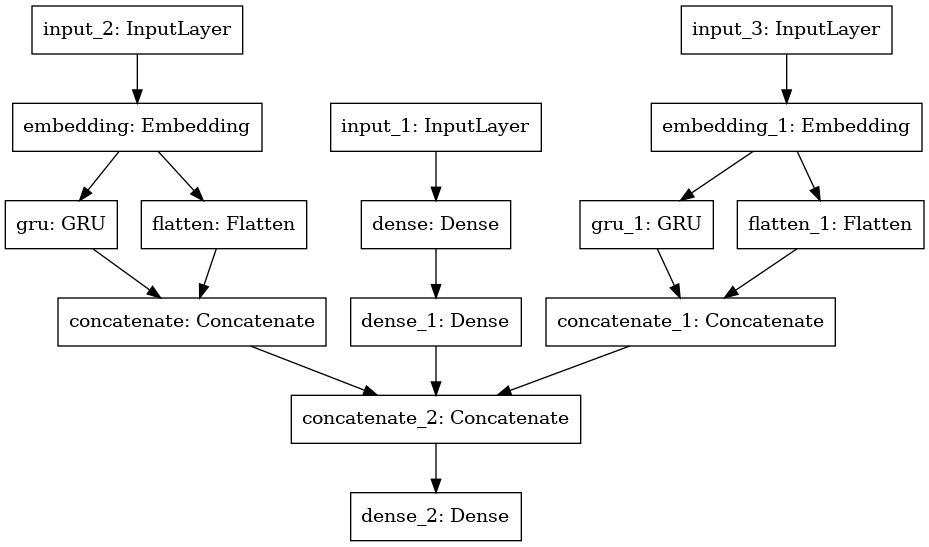

In [34]:
tf.keras.utils.plot_model(model)

In [35]:
desc_embedding.shape

NameError: name 'desc_embedding' is not defined

In [36]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

batch_size=32
epochs=3
history=model.fit(
    [x_train,desc_train,tweets_train],
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('./model.h5',save_best_only=True,save_weights_only=True),
        tf.keras.callbacks.ReduceLROnPlateau()
    ])


2022-04-13 06:37:49.134036: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3


2022-04-13 06:37:54.492425: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


329/329 [==============================] - 13s 22ms/step - loss: 0.8705 - accuracy: 0.5644 - val_loss: 0.7817 - val_accuracy: 0.6224
Epoch 2/3
329/329 [==============================] - 7s 20ms/step - loss: 0.3643 - accuracy: 0.8869 - val_loss: 0.8056 - val_accuracy: 0.6414
Epoch 3/3
329/329 [==============================] - 7s 21ms/step - loss: 0.0952 - accuracy: 0.9806 - val_loss: 0.8683 - val_accuracy: 0.6365


In [42]:

model.load_weights('./model.h5')

In [44]:
results=model.evaluate([x_test,desc_test,tweets_test],y_test,verbose=0)
print(results)

[0.7707710862159729, 0.639992892742157]


In [25]:
df['gender'].unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

In [26]:
x=preprocess_inputs(df)
x

(       gender:confidence  profile_yn:confidence  fav_number  retweet_count  \
 0               0.572304               0.127711   -0.353856      -0.030197   
 1               0.572304               0.127711   -0.348401      -0.030197   
 2              -1.377855               0.127711    0.263524       0.335319   
 3               0.572304               0.127711   -0.337651      -0.030197   
 4               0.572304               0.127711    2.639827      -0.030197   
 ...                  ...                    ...         ...            ...   
 18781           0.572304               0.127711    2.360338       0.335319   
 18782           0.572304               0.127711   -0.156352      -0.030197   
 18783           0.572304               0.127711   -0.205046      -0.030197   
 18784          -1.396345               0.127711   -0.180579      -0.030197   
 18785           0.572304               0.127711    0.831087      -0.030197   
 
        tweet_count  judgment_year  judgment_month